In [251]:
# Project 02

In [282]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [319]:
# Read data
data_train = pd.read_csv('merged_train.csv')
data_test = pd.read_csv('demographics_test.csv')

,County,State,2014 Population,2010 Population,Population Percent Change,Percent Under 5 Years,Percent Under 18 Years,Percent 65 and Older,Percent Female,Percent White,...,Ted Cruz.Percent of Votes,No Preference.Number of Votes,No Preference.Party,No Preference.Percent of Votes,Uncommitted.Number of Votes,Uncommitted.Party,Uncommitted.Percent of Votes,Democratic,Republican,Party
0,Clinton,IN,32776,33224,-1.3,6.9,26.3,15.8,50.5,97.8,...,39.9,0,NaN,0.0,0,NaN,0.0,1770,6363,0
1,Cass,NE,25524,25241,1.1,6.0,24.6,16.1,49.6,97.0,...,22.5,0,NaN,0.0,0,NaN,0.0,283,2767,0
2,Walton,GA,87615,83768,4.6,6.2,25.9,14.2,51.3,79.6,...,30.9,0,NaN,0.0,0,NaN,0.0,3278,18818,0
3,Norfolk,MA,692254,670850,3.2,5.4,21.6,15.7,52.1,80.9,...,8.8,6,NaN,0.3,0,NaN,0.0,1716,1686,1
4,Beaver,PA,169392,170539,-0.7,5.1,19.7,19.7,51.6,91.1,...,22.3,0,NaN,0.0,0,NaN,0.0,22526,19081,1


In [284]:
# TASK 1 - Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White','Percent Black or African American']],data_train['Party'],test_size=0.25,random_state=0)

In [285]:
# TASK 2 - Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     76.61
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           4.17e-18
Time:                        14:14:19   Log-Likelihood:                -24968.
No. Observations:                2115   AIC:                         4.994e+04
Df Residuals:                    2113   BIC:                         4.995e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.386e+04   2946.920     11.

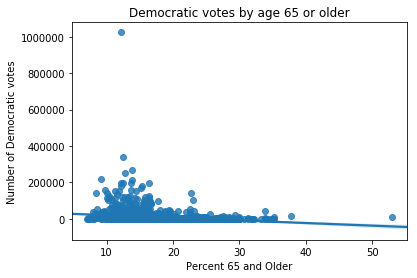

In [286]:
# TASK 3 - Build a simple linear regression model (one predictor variable) to predict the number of votes cast 
# for candidates from the Democratic party in each county. Consider multiple predictor variables. Compute evaluation 
# metrics and report your results.
axis = sns.regplot(data_train['Percent 65 and Older'],data_train['Democratic'])
axis.set(title='Democratic votes by age 65 or older', xlabel='Percent 65 and Older', ylabel='Number of Democratic votes')

data65AndOlder=data_train['Percent 65 and Older']

model=smf.ols(formula='Democratic ~ data65AndOlder', data=data_train)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     67.56
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           3.52e-16
Time:                        14:14:20   Log-Likelihood:                -24972.
No. Observations:                2115   AIC:                         4.995e+04
Df Residuals:                    2113   BIC:                         4.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.974e+04   3827.106     

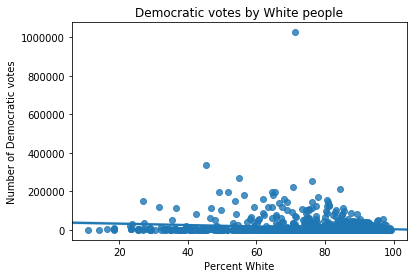

In [287]:
# TASK 3 CONTINUED
axis = sns.regplot(data_train['Percent White'],data_train['Democratic'])
axis.set(title='Democratic votes by White people', xlabel='Percent White', ylabel='Number of Democratic votes')

dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Democratic ~ dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

In [288]:
# TASK 3 CONTINUED - Train and test simple linear regression model (Democratic votes)
r_squared = 0.035,0.031

In [289]:
# TASK 4 - Build a multiple linear regression model (more than one predictor variable) to predict the number of votes 
# cast for candidates from the Democratic party in each county. Consider multiple combinations of predictor variables.
# Compute evaluation metrics and report your results.
data65AndOlder=data_train['Percent 65 and Older']
dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Democratic ~ data65AndOlder+dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     56.84
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           9.07e-25
Time:                        14:14:21   Log-Likelihood:                -24950.
No. Observations:                2115   AIC:                         4.991e+04
Df Residuals:                    2112   BIC:                         4.992e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.196e+04   4206.321     

In [290]:
# TASK 4 CONTINUED 
data65AndOlder=data_train['Percent 65 and Older']
dataBlack=data_train['Percent Black or African American']

model=smf.ols(formula='Democratic ~ data65AndOlder+dataBlack', data=data_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     43.11
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           4.46e-19
Time:                        14:14:22   Log-Likelihood:                -24963.
No. Observations:                2115   AIC:                         4.993e+04
Df Residuals:                    2112   BIC:                         4.995e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.049e+04   3142.626      9.

In [291]:
# TASK 4 CONTINUED - Train and test multiple linear regression model (Democratic votes)
r_squared = 0.051,0.039
adjusted_r_squared = 0.050,0.038

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.46e-25
Time:                        14:14:23   Log-Likelihood:                -24009.
No. Observations:                2115   AIC:                         4.802e+04
Df Residuals:                    2113   BIC:                         4.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.897e+04   1872.761     15.

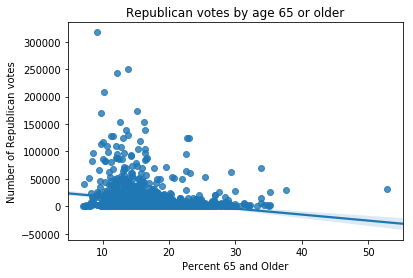

In [292]:
# TASK 5 - Build a simple linear regression model (one predictor variable) to predict the number of votes cast for 
# candidates from the Republican party in each county. Consider multiple predictor variables. Compute evaluation 
# metrics and report your results.
axis = sns.regplot(data_train['Percent 65 and Older'],data_train['Republican'])
axis.set(title='Republican votes by age 65 or older', xlabel='Percent 65 and Older', ylabel='Number of Republican votes')

data65AndOlder=data_train['Percent 65 and Older']

model=smf.ols(formula='Republican ~ data65AndOlder', data=data_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     28.25
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.18e-07
Time:                        14:14:23   Log-Likelihood:                -24050.
No. Observations:                2115   AIC:                         4.810e+04
Df Residuals:                    2113   BIC:                         4.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.264e+04   2474.158     

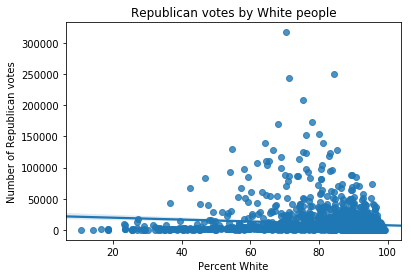

In [293]:
# TASK 5 - CONTINUED
axis = sns.regplot(data_train['Percent White'],data_train['Republican'])
axis.set(title='Republican votes by White people', xlabel='Percent White', ylabel='Number of Republican votes')

dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Republican ~ dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

In [294]:
# TASK 5 CONTINUED - Train and test simple linear regression model (Republican votes)
r_squared = 0.050,0.013

In [295]:
# TASK 6 - Build a multiple linear regression model (more than one predictor variable) to predict the number of votes 
# cast for candidates from the Republican party in each county. Consider multiple combinations of predictor variables.
# Compute evaluation metrics and report your results.
data65AndOlder=data_train['Percent 65 and Older']
dataWhite=data_train['Percent White']

model=smf.ols(formula='Republican ~ data65AndOlder+dataWhite', data=data_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     59.13
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.03e-25
Time:                        14:14:25   Log-Likelihood:                -24006.
No. Observations:                2115   AIC:                         4.802e+04
Df Residuals:                    2112   BIC:                         4.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.367e+04   2691.913     12.

In [296]:
# TASK 6 CONTINUED
data65AndOlder=data_train['Percent 65 and Older']
dataBlack=data_train['Percent Black or African American']

model=smf.ols(formula='Republican ~ data65AndOlder+dataBlack', data=data_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Republican   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     56.55
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.19e-24
Time:                        14:14:25   Log-Likelihood:                -24009.
No. Observations:                2115   AIC:                         4.802e+04
Df Residuals:                    2112   BIC:                         4.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.827e+04   2001.062     14.

In [297]:
# TASK 6 CONTINUED - Train and test multiple linear regression model (Republican votes)
r_squared = 0.053,0.051
adjusted_r_squared = 0.052,0.050

In [298]:
# TASK 7 - Build a classification model to classify each county as Democratic or Republican. Consider at least two 
# different classification techniques with multiple combinations of parameters and multiple combinations of variables.
# Compute evaluation metrics and report your results.
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  18,  1, 48.25      , 0.83578061, 1586, 1.586e+03)
 (  2,  17,  2, 57.45000076, 0.45583146,   73, 7.300e+01)
 (  3,  16,  0, 16.04999924, 0.65002242,   42, 4.200e+01)
 (  4,   5,  1, 33.5       , 0.85545081,   25, 2.500e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    5, 5.000e+00)
 (  6,  11,  1, 41.04999924, 0.93406806,   20, 2.000e+01)
 (  7,   8,  2,  0.75      , 0.98522814,    7, 7.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 (  9,  10,  2, 56.45000076, 0.81127812,    4, 4.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    1, 1.000e+00)
 ( 12,  13,  0, 14.64999962, 0.77934984,   13, 1.300e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    8, 8.000e+00)
 ( 14,  15,  2, 52.        , 0.97095059,    5, 5.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    2, 2.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,   17, 1.700e+01)
 ( -1,  -1, -2

829

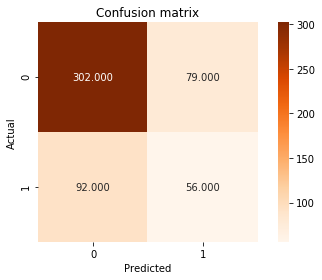

In [299]:
# TASK 7 CONTINUED - Decision Trees(Confusion Matrix)
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [300]:
# TASK 7 CONTINUED - Decision Trees(Evaluation Matrix)
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.6767485822306238

Error
0.32325141776937616

Precision
[0.76649746 0.41481481]

Recall
[0.79265092 0.37837838]

F1_score
[0.77935484 0.39575972]


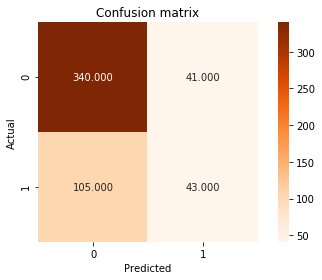

In [301]:
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix)
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [302]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix)
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.724007561436673

Error
0.275992438563327

Precision
[0.76404494 0.51190476]

Recall
[0.89238845 0.29054054]

F1_score
[0.82324455 0.37068966]


In [303]:
# TASK 7 CONTINUED - With different combinations of parameters and different combinations of variables
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  20,  1, 48.25      , 0.83578061, 1586, 1.586e+03)
 (  2,  19,  0, 16.04999924, 0.45583146,   73, 7.300e+01)
 (  3,   4,  1, 33.5       , 0.65002242,   42, 4.200e+01)
 ( -1,  -1, -2, -2.        , 0.        ,   19, 1.900e+01)
 (  5,  18,  0, 15.80000019, 0.88654089,   23, 2.300e+01)
 (  6,  11,  0, 12.44999981, 0.84535094,   22, 2.200e+01)
 (  7,  10,  1, 41.54999924, 1.        ,    8, 8.000e+00)
 (  8,   9,  0, 10.44999981, 0.72192809,    5, 5.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    4, 4.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 ( 12,  17,  1, 45.5       , 0.59167278,   14, 1.400e+01)
 ( 13,  14,  0, 14.64999962, 0.39124356,   13, 1.300e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    8, 8.000e+00)
 ( 15,  16,  0, 14.85000038, 0.72192809,    5, 5.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.        , 0.        ,    4, 4.000e+00)
 ( -1,  -1, -2

987

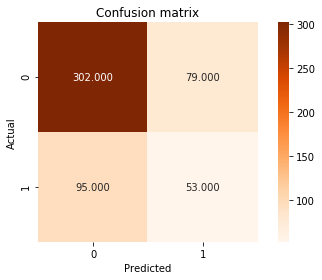

In [304]:
# TASK 7 CONTINUED - Decision Trees(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [305]:
# TASK 7 CONTINUED - Decision Trees(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.6710775047258979

Error
0.3289224952741021

Precision
[0.76070529 0.40151515]

Recall
[0.79265092 0.35810811]

F1_score
[0.77634961 0.37857143]


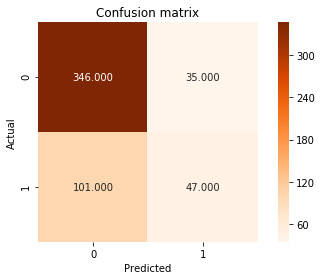

In [306]:
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [307]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7429111531190926

Error
0.2570888468809074

Precision
[0.77404922 0.57317073]

Recall
[0.90813648 0.31756757]

F1_score
[0.83574879 0.40869565]


In [328]:
# TASK 8 - Build a clustering model to cluster the counties. Consider at least two different clustering techniques 
# with multiple combinations of parameters and multiple combinations of variables. Compute unsupervised and supervised 
# evaluation metrics with the party of the counties (Democratic or Republican) as the true cluster and report your 
# results.

In [376]:
# TASK 8 CONTINUED - Favoring the republican party
X = data_train[['Percent 65 and Older', 'Percent White','Percent High School or Higher']]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [377]:
# TASK 8 CONTINUED - HINT: Use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

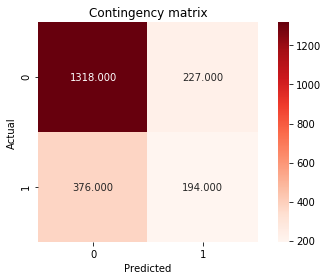

In [378]:
# TASK 8 CONTINUED - plot contingency matrix for hierarchical clustering with complete linkage method
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [379]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.1164870473127616


silhouette_coefficient
0.5863225882340815


In [394]:
# TASK 8 CONTINUED - Favoring the democratic party
X = data_train[['Percent Asian','Percent Black or African American','Percent Hispanic or Latino',"Percent Bachelor's Degree or Higher"]]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [395]:
# TASK 8 CONTINUED - HINT: Use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

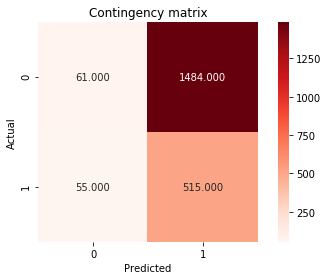

In [396]:
# TASK 8 CONTINUED - plot contingency matrix for hierarchical clustering with complete linkage method
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [397]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.046651268834218815


silhouette_coefficient
0.5868011893127529
